In [1]:
import matplotlib.pyplot as plt
from scipy.stats import beta
from math import sin

In [2]:
# prior p(theta)
prior = beta(1, 1).pdf
# prior = lambda theta: sin(theta*10) + 1

In [3]:
# data (x)
k = 2
n = 3

In [4]:
# likelihood: p(x|theta)
likelihood = lambda theta: theta**k * (1-theta)**(n-k)

In [5]:
likelihood(0.5)

0.125

In [6]:
# posterior (unnormalized): p(x|theta) * p(theta)
posterior_prop = lambda theta: likelihood(theta) * prior(theta)

In [7]:
from scipy.integrate import quad

# evidence p(x)
evidence = quad(posterior_prop, 0, 1)[0]
evidence

0.08333333333333334

In [8]:
# numerical calculation of posterior
posterior = lambda theta: posterior_prop(theta) / evidence

In [9]:
import numpy as np
theta_grid = np.linspace(0.001, 0.999, 1000)

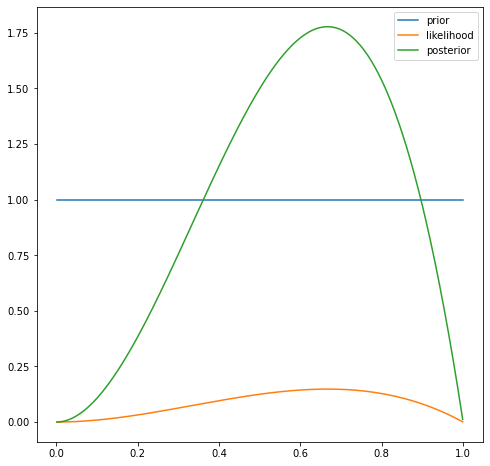

In [10]:
plt.figure(figsize=(8,8))
plt.plot(theta_grid, [prior(t) for t in theta_grid], label='prior')
plt.plot(theta_grid, [likelihood(t) for t in theta_grid], label='likelihood')
plt.plot(theta_grid, [posterior(t) for t in theta_grid], label='posterior')
plt.legend(loc='best')
plt.show()

In [11]:
# exact bayes inference with uniform prior
posterior_exact = beta(k+1, n-k+1)

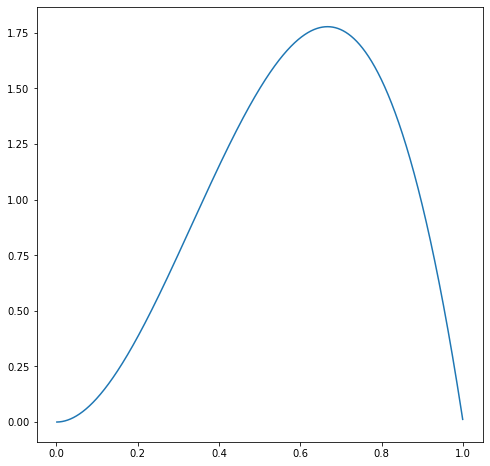

In [12]:
plt.figure(figsize=(8,8))
theta_grid = np.linspace(0.001, 0.999, 10000)
plt.plot(theta_grid, [posterior_exact.pdf(t) for t in theta_grid])
#plt.xlim(0.03, 0.05)
plt.show()

In [13]:
# conf interval (conf. level = 0.95)
posterior_exact.ppf(0.025), posterior_exact.ppf(1-0.025)

(0.19412044968324338, 0.932414013511457)